# Лабораторная работа № 3. Титаник

На основе данных конкурса [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic) постройте модель логистической регресси для предсказания выживших пассажиров.

## Задание

1. Постройте классификатор используя доступные числовые признаки.
2. Оцените точность и полноту классификации. Постройте график ROC кривой.
3. Расширьте пространство признаков на основе имени пассажира и оцените качество новой модели.

Вариант с меньшим значением точности на тестовой выборке.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline


ds = pd.read_csv("train.csv")
ds

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
df = ds[["Name", "Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
df = pd.DataFrame(df.dropna())
df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df

,Name,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,"Braund, Mr. Owen Harris",0,3,1,22.0,1,0,7.2500,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,38.0,1,0,71.2833,C
2,"Heikkinen, Miss. Laina",1,3,0,26.0,0,0,7.9250,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,35.0,1,0,53.1000,S
4,"Allen, Mr. William Henry",0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,"Rice, Mrs. William (Margaret Norton)",0,3,0,39.0,0,5,29.1250,Q
886,"Montvila, Rev. Juozas",0,2,1,27.0,0,0,13.0000,S
887,"Graham, Miss. Margaret Edith",1,1,0,19.0,0,0,30.0000,S
889,"Behr, Mr. Karl Howell",1,1,1,26.0,0,0,30.0000,C


In [43]:
df["Embarked"].value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [44]:
df['Embarked'] = df['Embarked'].map({ 'S' : np.array([1,0,0]), 'C' : np.array([0,1,0]), 'Q' : np.array([0,0,1])})

In [45]:
df[['S', 'C', 'Q']] = pd.DataFrame(df['Embarked'].values.tolist(), index= df.index)

In [46]:
df["Embarked"].value_counts()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[1, 0, 0]    554
[0, 1, 0]    130
[0, 0, 1]     28
Name: Embarked, dtype: int64

In [47]:
df

,Name,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,S,C,Q
0,"Braund, Mr. Owen Harris",0,3,1,22.0,1,0,7.2500,"[1, 0, 0]",1,0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,38.0,1,0,71.2833,"[0, 1, 0]",0,1,0
2,"Heikkinen, Miss. Laina",1,3,0,26.0,0,0,7.9250,"[1, 0, 0]",1,0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,35.0,1,0,53.1000,"[1, 0, 0]",1,0,0
4,"Allen, Mr. William Henry",0,3,1,35.0,0,0,8.0500,"[1, 0, 0]",1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,"Rice, Mrs. William (Margaret Norton)",0,3,0,39.0,0,5,29.1250,"[0, 0, 1]",0,0,1
886,"Montvila, Rev. Juozas",0,2,1,27.0,0,0,13.0000,"[1, 0, 0]",1,0,0
887,"Graham, Miss. Margaret Edith",1,1,0,19.0,0,0,30.0000,"[1, 0, 0]",1,0,0
889,"Behr, Mr. Karl Howell",1,1,1,26.0,0,0,30.0000,"[0, 1, 0]",0,1,0


In [48]:
#df['Age'] = (df['Age'].values - df['Age'].mean()) / df['Age'].std()
#df['Fare'] = (df['Fare'].values - df['Fare'].mean()) / df['Fare'].std()
#df['Age'] = (df['Age'].values) / df['Age'].max()
#df['Fare'] = (df['Fare'].values) / df['Fare'].max()


In [49]:
df

,Name,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,S,C,Q
0,"Braund, Mr. Owen Harris",0,3,1,22.0,1,0,7.2500,"[1, 0, 0]",1,0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,38.0,1,0,71.2833,"[0, 1, 0]",0,1,0
2,"Heikkinen, Miss. Laina",1,3,0,26.0,0,0,7.9250,"[1, 0, 0]",1,0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,35.0,1,0,53.1000,"[1, 0, 0]",1,0,0
4,"Allen, Mr. William Henry",0,3,1,35.0,0,0,8.0500,"[1, 0, 0]",1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,"Rice, Mrs. William (Margaret Norton)",0,3,0,39.0,0,5,29.1250,"[0, 0, 1]",0,0,1
886,"Montvila, Rev. Juozas",0,2,1,27.0,0,0,13.0000,"[1, 0, 0]",1,0,0
887,"Graham, Miss. Margaret Edith",1,1,0,19.0,0,0,30.0000,"[1, 0, 0]",1,0,0
889,"Behr, Mr. Karl Howell",1,1,1,26.0,0,0,30.0000,"[0, 1, 0]",0,1,0


In [50]:
x = pd.DataFrame(df[["Name", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "S", "C", "Q"]])
y = pd.DataFrame(df['Survived'])

from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(x, y, test_size = 0.001)
x_train = X_train.drop(['Name'], axis = 1)
x_valid = X_valid.drop(['Name'], axis = 1)
x_train
y_train = Y_train
y_valid = Y_valid
x_train.sort_values(['Age'])

,Pclass,Sex,Age,SibSp,Parch,Fare,S,C,Q
803,3,1,0.42,0,1,8.5167,0,1,0
755,2,1,0.67,1,1,14.5000,1,0,0
644,3,0,0.75,2,1,19.2583,0,1,0
469,3,0,0.75,2,1,19.2583,0,1,0
78,2,1,0.83,0,2,29.0000,1,0,0
...,...,...,...,...,...,...,...,...,...
116,3,1,70.50,0,0,7.7500,0,0,1
493,1,1,71.00,0,0,49.5042,0,1,0
96,1,1,71.00,0,0,34.6542,0,1,0
851,3,1,74.00,0,0,7.7750,1,0,0


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
x_train = preprocessing.scale(x_train)
x_valid = preprocessing.scale(x_valid)
clf = LogisticRegression().fit(x_train, y_train.values.ravel())
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_predict = clf.predict(x_valid)
print("Precision ", precision_score(y_valid.values, y_predict))
print("Recall ", recall_score(y_valid.values, y_predict))

Precision  0.0
Recall  0.0


F:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F:\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


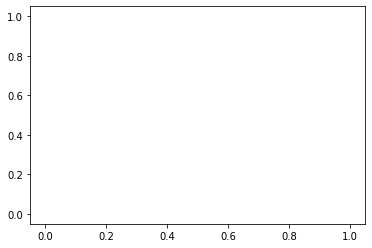

In [52]:
#ROC curve
from sklearn.metrics import roc_curve
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_valid, y_predict)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(fpr_rt_lm, tpr_rt_lm, color = 'red')

# Расширенная модель

In [53]:
X_train.sort_values(['Age'])

,Name,Pclass,Sex,Age,SibSp,Parch,Fare,S,C,Q
803,"Thomas, Master. Assad Alexander",3,1,0.42,0,1,8.5167,0,1,0
755,"Hamalainen, Master. Viljo",2,1,0.67,1,1,14.5000,1,0,0
644,"Baclini, Miss. Eugenie",3,0,0.75,2,1,19.2583,0,1,0
469,"Baclini, Miss. Helene Barbara",3,0,0.75,2,1,19.2583,0,1,0
78,"Caldwell, Master. Alden Gates",2,1,0.83,0,2,29.0000,1,0,0
...,...,...,...,...,...,...,...,...,...,...
116,"Connors, Mr. Patrick",3,1,70.50,0,0,7.7500,0,0,1
493,"Artagaveytia, Mr. Ramon",1,1,71.00,0,0,49.5042,0,1,0
96,"Goldschmidt, Mr. George B",1,1,71.00,0,0,34.6542,0,1,0
851,"Svensson, Mr. Johan",3,1,74.00,0,0,7.7750,1,0,0


In [54]:
X_train['Name'].value_counts()



Bengtsson, Mr. John Viktor                       1
Elsbury, Mr. William James                       1
Bateman, Rev. Robert James                       1
de Mulder, Mr. Theodore                          1
Andersson, Master. Sigvard Harald Elias          1
                                                ..
Pickard, Mr. Berk (Berk Trembisky)               1
Palsson, Miss. Torborg Danira                    1
Baxter, Mr. Quigg Edmond                         1
Appleton, Mrs. Edward Dale (Charlotte Lamson)    1
Vanden Steen, Mr. Leo Peter                      1
Name: Name, Length: 711, dtype: int64

In [55]:
X_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False).value_counts()


Mr          397
Miss        145
Mrs         107
Master       36
Dr            6
Rev           6
Mlle          2
Col           2
Major         2
Don           1
Ms            1
Sir           1
Capt          1
Countess      1
Lady          1
Mme           1
Jonkheer      1
Name: Name, dtype: int64

In [56]:
X_train['Name'] = X_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).map({'Mr' : np.array([1, 0, 0, 0, 0]),\
                                                                                'Mrs' : np.array([0, 1, 0, 0, 0]),\
                                                                                'Miss' : np.array([0, 0, 1, 0, 0]),\
                                                                                'Lady' : np.array([0, 0, 1, 0, 0]), \
                                                                                'Ms' : np.array([0, 0, 1, 0, 0]), \
                                                                                'Master' : np.array([0, 0, 0, 1, 0])})
X_valid['Name'] = X_valid['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).map({'Mr' : np.array([1, 0, 0, 0, 0]),\
                                                                                'Mrs' : np.array([0, 1, 0, 0, 0]),\
                                                                                'Miss' : np.array([0, 0, 1, 0, 0]),\
                                                                                'Lady' : np.array([0, 0, 1, 0, 0]), \
                                                                                'Ms' : np.array([0, 0, 1, 0, 0]), \
                                                                                'Master' : np.array([0, 0, 0, 1, 0])})
X_train

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Name,Pclass,Sex,Age,SibSp,Parch,Fare,S,C,Q
9,"[0, 1, 0, 0, 0]",2,0,14.0,1,0,30.0708,0,1,0
273,"[1, 0, 0, 0, 0]",1,1,37.0,0,1,29.7000,0,1,0
329,"[0, 0, 1, 0, 0]",1,0,16.0,0,1,57.9792,0,1,0
765,"[0, 1, 0, 0, 0]",1,0,51.0,1,0,77.9583,1,0,0
392,"[1, 0, 0, 0, 0]",3,1,28.0,2,0,7.9250,1,0,0
...,...,...,...,...,...,...,...,...,...,...
715,"[1, 0, 0, 0, 0]",3,1,19.0,0,0,7.6500,1,0,0
22,"[0, 0, 1, 0, 0]",3,0,15.0,0,0,8.0292,0,0,1
588,"[1, 0, 0, 0, 0]",3,1,22.0,0,0,8.0500,1,0,0
548,"[1, 0, 0, 0, 0]",3,1,33.0,1,1,20.5250,1,0,0


In [57]:
X_train['Name'].value_counts()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[1, 0, 0, 0, 0]    397
[0, 0, 1, 0, 0]    145
[0, 1, 0, 0, 0]    107
[0, 0, 0, 1, 0]     36
[0, 0, 1, 0, 0]      1
[0, 0, 1, 0, 0]      1
Name: Name, dtype: int64

In [58]:
 X_train.shape[0]

711

In [59]:
for i in range(0, X_train.shape[0]):
    if np.isnan(X_train['Name'].iloc[i]).all():
        X_train['Name'].iloc[i] = np.array([0, 0, 0, 0, 1])
        
for i in range(0, X_valid.shape[0]):
    if np.isnan(X_valid['Name'].iloc[i]).all():
        X_valid['Name'].iloc[i] = np.array([0, 0, 0, 0, 1])    

F:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
X_train['Name'].value_counts()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[1, 0, 0, 0, 0]    397
[0, 0, 1, 0, 0]    145
[0, 1, 0, 0, 0]    107
[0, 0, 0, 1, 0]     36
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 1, 0, 0]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 1, 0, 0]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
[0, 0, 0, 0, 1]      1
Name: Name, dtype: int64

In [61]:
X_train[['Mr', 'Mrs', 'Miss', 'Master', 'Other']] = pd.DataFrame(X_train['Name'].values.tolist(), index= X_train.index)
X_valid[['Mr', 'Mrs', 'Miss', 'Master', 'Other']] = pd.DataFrame(X_valid['Name'].values.tolist(), index= X_valid.index)
X_train

F:\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Name,Pclass,Sex,Age,SibSp,Parch,Fare,S,C,Q,Mr,Mrs,Miss,Master,Other
9,"[0, 1, 0, 0, 0]",2,0,14.0,1,0,30.0708,0,1,0,0,1,0,0,0
273,"[1, 0, 0, 0, 0]",1,1,37.0,0,1,29.7000,0,1,0,1,0,0,0,0
329,"[0, 0, 1, 0, 0]",1,0,16.0,0,1,57.9792,0,1,0,0,0,1,0,0
765,"[0, 1, 0, 0, 0]",1,0,51.0,1,0,77.9583,1,0,0,0,1,0,0,0
392,"[1, 0, 0, 0, 0]",3,1,28.0,2,0,7.9250,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,"[1, 0, 0, 0, 0]",3,1,19.0,0,0,7.6500,1,0,0,1,0,0,0,0
22,"[0, 0, 1, 0, 0]",3,0,15.0,0,0,8.0292,0,0,1,0,0,1,0,0
588,"[1, 0, 0, 0, 0]",3,1,22.0,0,0,8.0500,1,0,0,1,0,0,0,0
548,"[1, 0, 0, 0, 0]",3,1,33.0,1,1,20.5250,1,0,0,1,0,0,0,0


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
X_train = pd.DataFrame(X_train.drop(['Name'], axis = 1))
X_valid = pd.DataFrame(X_valid.drop(['Name'], axis = 1))
X_train = preprocessing.scale(X_train)
X_valid = preprocessing.scale(X_valid)
clf_for_more = LogisticRegression().fit(X_train, Y_train.values.ravel())
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
Y_predict = clf_for_more.predict(X_valid)
print("Precision ", precision_score(Y_valid.values, Y_predict))
print("Recall ", recall_score(Y_valid.values, Y_predict))

Precision  0.0
Recall  0.0


F:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F:\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


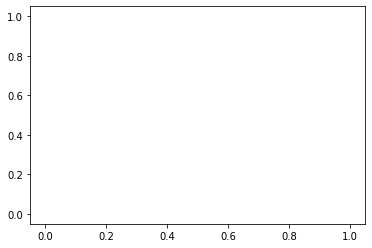

In [63]:
#ROC curve
from sklearn.metrics import roc_curve
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(Y_valid, Y_predict)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(fpr_rt_lm, tpr_rt_lm, color = 'red')

# Вывод
Дополнение признаков уведичили показатели модели

# Test

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline


ds = pd.read_csv("test.csv")
ds = ds.set_index('PassengerId')

pred = pd.read_csv("gender_submission.csv")
pred = pred.set_index('PassengerId')
#ds.merge(pred, left_on = 'PassengerId', right_index= True)
pred.head()

Populating the interactive namespace from numpy and matplotlib


F:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [65]:
ds

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [66]:
result = ds.join(pred, how='inner')
ds = pd.DataFrame(result.reset_index())
ds.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [67]:
df = ds[["Name", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Survived"]]
df = pd.DataFrame(df.dropna())
df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [68]:
df["Embarked"].value_counts()

S    227
C     82
Q     22
Name: Embarked, dtype: int64

In [69]:
df['Embarked'] = df['Embarked'].map({ 'S' : np.array([1,0,0]), 'C' : np.array([0,1,0]), 'Q' : np.array([0,0,1])})

In [70]:
df[['S', 'C', 'Q']] = pd.DataFrame(df['Embarked'].values.tolist(), index= df.index)

In [71]:
df["Embarked"].value_counts()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[1, 0, 0]    227
[0, 1, 0]     82
[0, 0, 1]     22
Name: Embarked, dtype: int64

In [72]:
df = pd.DataFrame(df.drop(["Embarked"], axis = 1))
df

,Name,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,S,C,Q
0,"Kelly, Mr. James",3,1,34.5,0,0,7.8292,0,0,0,1
1,"Wilkes, Mrs. James (Ellen Needs)",3,0,47.0,1,0,7.0000,1,1,0,0
2,"Myles, Mr. Thomas Francis",2,1,62.0,0,0,9.6875,0,0,0,1
3,"Wirz, Mr. Albert",3,1,27.0,0,0,8.6625,0,1,0,0
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",3,0,22.0,1,1,12.2875,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
409,"Peacock, Miss. Treasteall",3,0,3.0,1,1,13.7750,1,1,0,0
411,"Minahan, Mrs. William Edward (Lillian E Thorpe)",1,0,37.0,1,0,90.0000,1,0,0,1
412,"Henriksson, Miss. Jenny Lovisa",3,0,28.0,0,0,7.7750,1,1,0,0
414,"Oliva y Ocana, Dona. Fermina",1,0,39.0,0,0,108.9000,1,0,1,0


In [73]:
df['Name'].value_counts

<bound method IndexOpsMixin.value_counts of 0                                     Kelly, Mr. James
1                     Wilkes, Mrs. James (Ellen Needs)
2                            Myles, Mr. Thomas Francis
3                                     Wirz, Mr. Albert
4         Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                            ...                       
409                          Peacock, Miss. Treasteall
411    Minahan, Mrs. William Edward (Lillian E Thorpe)
412                     Henriksson, Miss. Jenny Lovisa
414                       Oliva y Ocana, Dona. Fermina
415                       Saether, Mr. Simon Sivertsen
Name: Name, Length: 331, dtype: object>

In [74]:
df['Name'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False).map({'Mr' : [1, 0, 0, 0, 0],\
                                                                                'Mrs' : [0, 1, 0, 0, 0],\
                                                                                'Miss' : [0, 0, 1, 0, 0],\
                                                                                'Lady' : [0, 0, 1, 0, 0], \
                                                                                'Ms' : [0, 0, 1, 0, 0], \
                                                                                'Master' : [0, 0, 0, 1, 0]})

X_train

array([[-0.28587866, -1.32105024, -1.07969251, ..., -0.51052747,
        -0.23094011, -0.18690773],
       [-1.48152412,  0.75697348,  0.50735844, ..., -0.51052747,
        -0.23094011, -0.18690773],
       [-1.48152412, -1.32105024, -0.94168808, ...,  1.95875846,
        -0.23094011, -0.18690773],
       ...,
       [ 0.9097668 ,  0.75697348, -0.52767479, ..., -0.51052747,
        -0.23094011, -0.18690773],
       [ 0.9097668 ,  0.75697348,  0.23134958, ..., -0.51052747,
        -0.23094011, -0.18690773],
       [ 0.9097668 ,  0.75697348, -1.76971466, ..., -0.51052747,
         4.33012702, -0.18690773]])

In [75]:
for i in range(0, df.shape[0]):
    if np.isnan(df['Name'].iloc[i]).all():
        df['Name'].iloc[i] =[0, 0, 0, 0, 1]
    

F:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [76]:
df['Name'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[1, 0, 0, 0, 0]    182
[0, 0, 1, 0, 0]     64
[0, 1, 0, 0, 0]     62
[0, 0, 0, 1, 0]     17
[0, 0, 0, 0, 1]      6
Name: Name, dtype: int64

In [77]:
df[['Mr', 'Mrs', 'Miss', 'Master', 'Other']] = pd.DataFrame(df['Name'].values.tolist(), index= df.index)

In [78]:
#df['Age'] = (df['Age'].values - df['Age'].mean()) / df['Age'].std()
#df['Fare'] = (df['Fare'].values - df['Fare'].mean()) / df['Fare'].std()
#df['Age'] = (df['Age'].values) / df['Age'].max()
#df['Fare'] = (df['Fare'].values) / df['Fare'].max()
df = df.drop(['Name'], axis = 1) 

df

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,S,C,Q,Mr,Mrs,Miss,Master,Other
0,3,1,34.5,0,0,7.8292,0,0,0,1,1,0,0,0,0
1,3,0,47.0,1,0,7.0000,1,1,0,0,0,1,0,0,0
2,2,1,62.0,0,0,9.6875,0,0,0,1,1,0,0,0,0
3,3,1,27.0,0,0,8.6625,0,1,0,0,1,0,0,0,0
4,3,0,22.0,1,1,12.2875,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,3,0,3.0,1,1,13.7750,1,1,0,0,0,0,1,0,0
411,1,0,37.0,1,0,90.0000,1,0,0,1,0,1,0,0,0
412,3,0,28.0,0,0,7.7750,1,1,0,0,0,0,1,0,0
414,1,0,39.0,0,0,108.9000,1,0,1,0,0,0,0,0,1


In [79]:
Y_valid = pd.DataFrame(df['Survived'])
df = df.drop(['Survived'], axis = 1)   
Y_predict = clf_for_more.predict(df)
print("Precision ", precision_score(Y_valid.values, Y_predict))
print("Recall ", recall_score(Y_valid.values, Y_predict))
df

Precision  0.6111111111111112
Recall  0.1732283464566929


,Pclass,Sex,Age,SibSp,Parch,Fare,S,C,Q,Mr,Mrs,Miss,Master,Other
0,3,1,34.5,0,0,7.8292,0,0,1,1,0,0,0,0
1,3,0,47.0,1,0,7.0000,1,0,0,0,1,0,0,0
2,2,1,62.0,0,0,9.6875,0,0,1,1,0,0,0,0
3,3,1,27.0,0,0,8.6625,1,0,0,1,0,0,0,0
4,3,0,22.0,1,1,12.2875,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,3,0,3.0,1,1,13.7750,1,0,0,0,0,1,0,0
411,1,0,37.0,1,0,90.0000,0,0,1,0,1,0,0,0
412,3,0,28.0,0,0,7.7750,1,0,0,0,0,1,0,0
414,1,0,39.0,0,0,108.9000,0,1,0,0,0,0,0,1


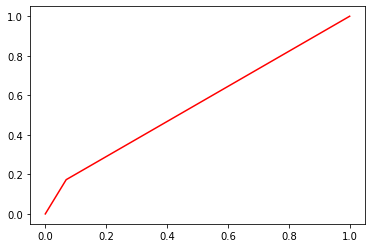

In [80]:
#ROC curve
from sklearn.metrics import roc_curve
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(Y_valid.values, Y_predict)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(fpr_rt_lm, tpr_rt_lm, color = 'red')

In [81]:
clf_for_more.score(df, Y_valid.values )

0.6404833836858006